# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Load the data

In [2]:
data_movies_metadata = pd.read_csv('movies_metadata.csv')

C:\Users\thdam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_ratings = pd.read_csv('ratings_small.csv')

# EDA and Preprocessing

In [4]:
data_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
data_movies_metadata.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'], dtype=object)

In [6]:
data_movies_metadata.describe(include='all')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,...,17336,NaN,NaN,1931,6,20283,42277,2,NaN,NaN
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Alice in Wonderland,No overview found.,...,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


In [7]:
data_movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [74]:
data_ratings.columns.values

array(['userId', 'movieId', 'rating', 'timestamp'], dtype=object)

In [75]:
data_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [76]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [77]:
data_ratings['rating'].describe()

count   100004.00
mean         3.54
std          1.06
min          0.50
25%          3.00
50%          4.00
75%          4.00
max          5.00
Name: rating, dtype: float64

In [78]:
data_ratings['rating'].value_counts(normalize=True)*100

4.00   28.75
3.00   20.06
5.00   15.09
3.50   10.54
4.50    7.72
2.00    7.27
2.50    4.45
1.00    3.33
1.50    1.69
0.50    1.10
Name: rating, dtype: float64

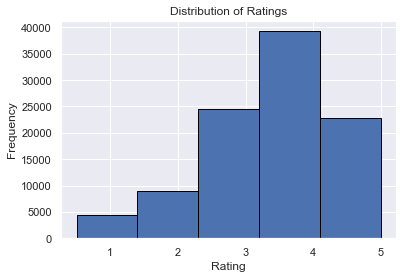

In [79]:
data_ratings['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

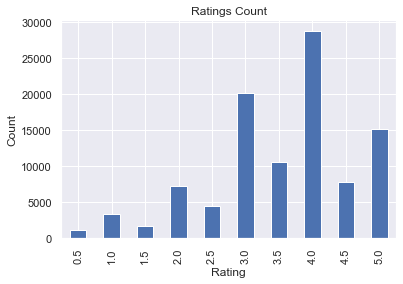

In [80]:
data_ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Ratings Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

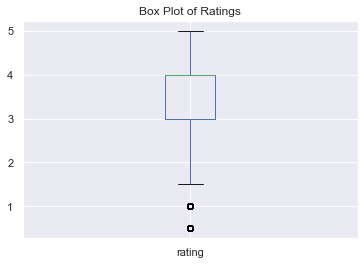

In [81]:
data_ratings['rating'].plot(kind='box')
plt.title('Box Plot of Ratings')
plt.show()

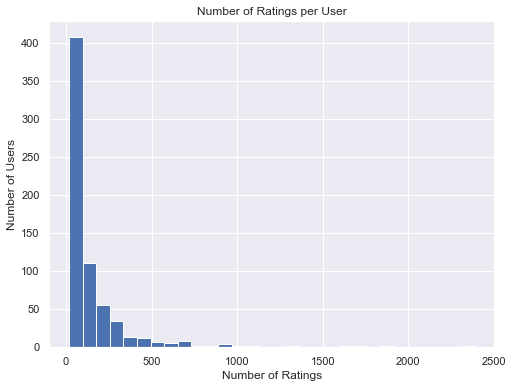

In [86]:
# Number of ratings per user
ratings_per_user = data_ratings.groupby('userId')['rating'].count()

plt.figure(figsize=(8, 6))
plt.hist(ratings_per_user, bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

In [10]:
data_ratings['movieId'] = data_ratings['movieId'].astype(str)
data_movies_metadata['id'] = data_movies_metadata['id'].astype(str)
data = pd.merge(data_ratings, data_movies_metadata, left_on='movieId', right_on='id', how='inner')
data.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1371,2.5,1260759135,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
1,4,1371,4.0,949810302,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
2,7,1371,3.0,851869160,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
3,19,1371,4.0,855193404,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
4,21,1371,3.0,853852263,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0


In [12]:
data.shape

(44994, 28)

In [16]:
duplicates = data[data.duplicated(subset=['userId', 'movieId'], keep=False)]
duplicates

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
43650,294,4912,4.0,1143064198,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43651,294,4912,4.0,1143064198,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43652,311,4912,3.5,1115160516,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43653,311,4912,3.5,1115160516,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43654,452,4912,2.5,1133735678,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43655,452,4912,2.5,1133735678,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43656,547,4912,4.5,1199391512,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43657,547,4912,4.5,1199391512,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43658,575,4912,3.0,1012605645,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0
43659,575,4912,3.0,1012605645,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,...,2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,False,6.6,281.0


In [13]:
data_unique = data.drop_duplicates(subset=['userId', 'movieId'], keep='first')

In [14]:
duplicates = data_unique[data_unique.duplicated(subset=['userId', 'movieId'], keep=False)]
duplicates

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [17]:
data_unique.shape

(44989, 28)

In [19]:
data_unique[data_unique['movieId'] == '6016']

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
31118,15,6016,2.0,1093027992,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31119,16,6016,4.0,1178364961,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31120,17,6016,5.0,1127470498,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31121,23,6016,5.0,1148670462,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31122,26,6016,5.0,1352597728,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31182,615,6016,4.5,1408778532,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31183,623,6016,5.0,1225258320,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31184,624,6016,5.0,1313254231,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0
31185,648,6016,4.5,1138478138,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,6016,...,2003-04-03,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He doesn't want money. He wants what money can...,The Good Thief,False,6.0,32.0


# User Item Matrix

In [31]:
user_item_matrix = data_unique.pivot(index='userId', columns='movieId', values='rating').fillna(0)

print(user_item_matrix)

movieId  100  100017  100032  100272  100450  101  101362  1018  101904  102  \
userId                                                                         
1        0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
2        0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
3        0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
4        0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
5        0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
...      ...     ...     ...     ...     ...  ...     ...   ...     ...  ...   
667      0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
668      0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
669      0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
670      0.0     0.0     0.0     0.0     0.0  0.0     0.0   0.0     0.0  0.0   
671      0.0     0.0     0.0     0.0    

In [26]:
type(user_item_matrix)

pandas.core.frame.DataFrame

# Training

In [37]:
from sklearn.neighbors import NearestNeighbors
cf_knn_model= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

In [38]:
from fuzzywuzzy import process

C:\Users\thdam\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Recommenting

In [67]:
def movie_recommender_engine(movie_name, matrix, cf_model, n_recs):
    # Fit model on matrix
    cf_knn_model.fit(matrix.T)

    # Extract input movie ID
    index=process.extractOne(movie_name, data_unique['title'])[2]
    movie_id = data_unique.iloc[index]['movieId']
    # Calculate neighbour distances
    distances, indices = cf_knn_model.kneighbors(user_item_matrix[movie_id].to_numpy().reshape(1, -1), n_neighbors=10)
    movie_rec_ids = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]

    # List to store recommendations
    cf_recs = []
    for i in movie_rec_ids:
        cf_recs.append({'Title':data_unique['title'][i[0]],'Distance':i[1]})

    # Select top number of recommendations needed
    df = pd.DataFrame(cf_recs, index = range(1,n_recs))

    return df 

In [75]:
n_recs = 10
movie_recommender_engine('Batman', user_item_matrix, cf_knn_model, n_recs)

,Title,Distance
1,Lost in Translation,0.543031
2,2001: A Space Odyssey,0.512195
3,Back to the Future Part II,0.500244
4,The Science of Sleep,0.375305
5,Ocean's Eleven,0.375305
6,Terminator 3: Rise of the Machines,0.375305
7,2001: A Space Odyssey,0.375305
8,The Science of Sleep,0.233202
9,Night on Earth,0.219131
